# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import Packages

In [2]:
import os
import csv
import sqlite3
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind

## 3. Connect SQLite to Python

In [3]:
# Membuat koneksi ke database
db = '/content/drive/MyDrive/IntroPython/Proyek_Mandiri_case1/CoffeeShop_Dataset.db'
conn = sqlite3.connect(db)

# Membuat cursor untuk memanggil sql statement
cur = conn.cursor()

## 4. Data Preparation Using SQL

In [4]:
# Mengecek table yang ada di db
cur.execute('''select name
               from sqlite_master
               where type='table' ''')
cur.fetchall()

[('sales outlet',),
 ('pastry inventory',),
 ('product',),
 ('generations',),
 ('sales reciepts',),
 ('customer',)]

In [5]:
 # mengambil semua baris dari hasil query
rows = cur.fetchall()

In [6]:
# mengubah ke csv
def export_csv(file_name):
  with open(file_name, 'w', newline='') as f :
    writer = csv.writer(f)
    writer.writerow([i[0] for i in cur.description]) # menulis kolom
    for row in rows :
      writer.writerow(row)

### UBAH TABLE sales outlet ke Sales_Outlet.csv


In [7]:
# Mengeksekusi kueri SQL untuk mengambil data dari tabel
cur.execute("SELECT * FROM 'sales outlet'")
# Mengambil semua baris dari hasil kueri
rows = cur.fetchall()
export_csv('Sales_Outlet.csv')

### UBAH TABLE pastry inventory ke Pastry_Inventory.csv

In [8]:
cur.execute("SELECT * FROM 'pastry inventory'")
rows = cur.fetchall()
export_csv('Pastry_Inventory.csv')

### UBAH TABLE product ke Product.csv

In [9]:
cur.execute("SELECT * FROM product")
rows = cur.fetchall()
export_csv('Product.csv')

### UBAH TABLE generations ke Generations.csv

In [10]:
cur.execute("SELECT * FROM generations")
rows = cur.fetchall()
export_csv('Generations.csv')

### UBAH TABLE sales reciepts ke Sales_Reciepts.csv

In [11]:
cur.execute("SELECT * FROM 'sales reciepts'")
rows = cur.fetchall()
export_csv('Sales_Reciepts.csv')

### UBAH TABLE customer ke Customer.csv

In [12]:
cur.execute("SELECT * FROM customer")
rows = cur.fetchall()
export_csv('Customer.csv')

## 5. Problem Statement

Hal yang menarik yang dapat dianalisis :
1.	Profilling Pelanggan

    Problem Statement : Melakukan analisi terkait profil pembeli untuk meningkatkan loyalitas pelanggan dengan memperhatikan preferensi mereka 

  Pertanyaan :
  -	Apakah ada penambahan / pengurangan customer per bulan?
  - Berapakah rata-rata uang yg dikerluarin customer ?
  -	Apakah ada perbedaan produk yang diminati berdasarkan generasi?


2. Penjualan Produk 

    Problem Statement : Memberikan rekomendasi variasi produk untuk meningkatkan revenue

  Pertanyaan : 
  -	Apakah terjadi kenaikan penjualan yang cukup signifikan pada produk yang memiliki promo ?
  -	Produk apa saja yang banyak diminati oleh customer pada setiap store ?


3.	Outlet Penjualan

    Problem Statement : Menganalisis distribusi tempat penjualan untuk mengetahui potensi pembukaan cabang toko baru maupun toko yang harus ditutup

  Pertanyaan :
  -	Store coffee shop wilayah mana yang memiliki pengunjung sangat banyak maupun yang sedikit?


4.	Transaksi Penjualan

    Problem Statement :Menganalisis keuntungan yang di dapat dari penjualan
  Pertanyaan :
  -	Store mana yang mempunyai penjualan terbanyak dan memiliki keuntungan yang banyak?
  -	Bagaimana strategi yang efektif untuk meningkatkan penjualan pada masing-masing store?


5.	Inventory Produk

    Problem Statement : Menentukan stok produk yang harus di tingkatkan pada masing-masing store.
  Pertanyaan :
  -	Berapa banyak produk yang tersisa pada setiap store dan produk apa itu?
  -	Produk apa yang selalu habis pada setiap store?





## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

In [13]:
# Membuat load ke data
path = '/content/drive/MyDrive/IntroPython/Coffee_Shop_Data/'
os.listdir(path)

['Customer.csv',
 'Generations.csv',
 'Pastry_Inventory.csv',
 'Product.csv',
 'Sales_Outlet.csv',
 'Sales_Reciepts.csv']

In [14]:
# Membuat function untuk deteksi outlier
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

def hasil_outlier(data_detect):
  sample_outliers = detect_outliers_iqr(data_detect)
  print("Banyaknya outlier ",len(sample_outliers))
  print("Beberapa outlier dari data: ", sample_outliers)

In [15]:
# Membuat function handle_outlier
# handle_outlier_median
def handle_outlier_median(dt_out):
  tr=[]
  sample_outliers = detect_outliers_iqr(dt_out)
  for y in dt_out:
    ff = y in sample_outliers
    if ff is True:
        y=statistics.median(dt_out)
    else:
        y=y
    tr.append(int(y))
  return tr

#handle_outlier_mean
def handle_outlier_mean(dt_out):
  tr=[]
  sample_outliers = detect_outliers_iqr(dt_out)
  for y in dt_out:
    ff = y in sample_outliers
    if ff is True:
        y=statistics.mean(dt_out)
    else:
        y=y
    tr.append(int(y))
  return tr

#### Data prep Customer


In [16]:
Cust = pd.read_csv(path+'Customer.csv')
# Membaca isi data
Cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [17]:
# Cek tipe data & missing value
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


Dari info data customer didapat bahwa tidak adanya missing value, tetapi ada beberapa tipe data yang tidak sesuai, seperti customer since dan birthdate yang harus diubah ke tipe data date kemudian customer_id dan home_store diubah ke string

In [18]:
# Mengubah tipe data yang tidak sesuai
Cust['customer_since']=pd.to_datetime(Cust['customer_since'])
Cust['birthdate']=pd.to_datetime(Cust['birthdate'])
Cust['customer_id']=Cust['customer_id'].astype(str)
Cust['home_store']=Cust['home_store'].astype(str)

In [19]:
# Menambahkan table umur
Cust['Usia'] = pd.Timestamp.now().year - Cust['birth_year']
Cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,Usia
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,73
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,73
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,73
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,73
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,72


In [20]:
# Cek kembali tipe data
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2246 non-null   object        
 1   home_store           2246 non-null   object        
 2   customer_first-name  2246 non-null   object        
 3   customer_email       2246 non-null   object        
 4   customer_since       2246 non-null   datetime64[ns]
 5   loyalty_card_number  2246 non-null   object        
 6   birthdate            2246 non-null   datetime64[ns]
 7   gender               2246 non-null   object        
 8   birth_year           2246 non-null   int64         
 9   Usia                 2246 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 175.6+ KB


In [21]:
# cek duplicate
Cust[Cust.duplicated(keep=False)]

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,Usia


In [22]:
# cek outlier
hasil_outlier(Cust['birth_year'])

Banyaknya outlier  0
Beberapa outlier dari data:  []


In [23]:
hasil_outlier(Cust['Usia'])

Banyaknya outlier  0
Beberapa outlier dari data:  []


#### Data prep Generations

In [24]:
# Membaaca data
Gen = pd.read_csv(path+'Generations.csv')
Gen.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [25]:
# Cek tipe data & missing value
Gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


Dari info data generations tidak adanya missing value dan tipe data sudah benar

In [26]:
# cek duplicate
Gen[Gen.duplicated(keep=False)]

,birth_year,generation


In [27]:
# cek outlier
hasil_outlier(Gen['birth_year'])

Banyaknya outlier  0
Beberapa outlier dari data:  []


#### Data prep Pastry_Inventory

In [28]:
# Membaca data
Pas_inv = pd.read_csv(path+'Pastry_Inventory.csv')
Pas_inv.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [29]:
# cek tipe data & missing value
Pas_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


Dari data tersebut tipe data pada sales_outlet_id dan product_id akan diganti menjadi object dan tipe data transaction_date diganti menjadi date, sedangkan %waste akan diganti float

In [30]:
# Mengubah tipe data yang tidak sesuai
to_string = ['sales_outlet_id','product_id']
for string in to_string:
  Pas_inv[string]=(Pas_inv[string]).astype(str)

Pas_inv['transaction_date']=pd.to_datetime(Pas_inv['transaction_date'])

In [31]:
# Hapus terlebih dahulu tanda %
Pas_inv['% waste'] = Pas_inv['% waste'].str.replace('%','')
#ubah ke integer
Pas_inv['% waste'] = Pas_inv['% waste'].astype(int)

In [32]:
Pas_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    object        
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    object        
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 16.9+ KB


In [33]:
Pas_inv.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,2019-04-01,69,18,8,10,56
1,3,2019-04-01,70,18,12,6,33
2,3,2019-04-01,71,18,8,10,56
3,3,2019-04-01,72,48,9,39,81
4,3,2019-04-01,73,18,9,9,50


In [34]:
# cek duplicate
Pas_inv[Pas_inv.duplicated(keep=False)]

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste


In [35]:
# cek outlier
hasil_outlier(Pas_inv['start_of_day'])

Banyaknya outlier  62
Beberapa outlier dari data:  [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]


In [36]:
hasil_outlier(Pas_inv['quantity_sold'])

Banyaknya outlier  21
Beberapa outlier dari data:  [19, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 27, 28, 29, 30, 31, 32]


In [37]:
hasil_outlier(Pas_inv['waste'])

Banyaknya outlier  49
Beberapa outlier dari data:  [26, 26, 26, 27, 27, 27, 28, 29, 30, 30, 30, 32, 34, 37, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 42, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 47]


In [38]:
hasil_outlier(Pas_inv['% waste'])

Banyaknya outlier  4
Beberapa outlier dari data:  [0, 0, 0, 0]


Dari analisa outlier terdapat oulier pada data 'start_of_day','quantity_sold','waste', dan % waste. Tetapi tidak dilakukan handling outlier karena jika dilakukan handling outlier data yang akan dihasilkan akan bias

#### Data prep Product

In [39]:
# Membaca isi data
Prod = pd.read_csv(path+'Product.csv')
Prod.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [40]:
# cek tipe data & missing value
Prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


Dari  info data  Produk tidak ada missing value, tetapi ada beberapa colom yang tipe datanya ada perubahan seperti product_id ke object dan current_retail_price ke tipe data float

In [41]:
# Mengubah tipe data
Prod['product_id']=Prod['product_id'].astype(str)

# Mengubah tipe data current_retail_price tetapi replace tanda dolar terlebih dahulu
Prod['current_retail_price'] = Prod['current_retail_price'].str.replace('$','')
#ubah ke integer
Prod['current_retail_price'] = Prod['current_retail_price'].astype(float)
#ubah nama kolom current_retail_price  menjadi current_retail_price ($)
Prod = Prod.rename(columns={"current_retail_price":"current_retail_price ($)"})


<ipython-input-41-a29726fd1be8>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Prod['current_retail_price'] = Prod['current_retail_price'].str.replace('$','')


In [42]:
Prod.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price ($),tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N


In [43]:
#cek ekmbali tipe data
Prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                88 non-null     object 
 1   product_group             88 non-null     object 
 2   product_category          88 non-null     object 
 3   product_type              88 non-null     object 
 4   product                   88 non-null     object 
 5   product_description       88 non-null     object 
 6   unit_of_measure           88 non-null     object 
 7   current_wholesale_price   88 non-null     float64
 8   current_retail_price ($)  88 non-null     float64
 9   tax_exempt_yn             88 non-null     object 
 10  promo_yn                  88 non-null     object 
 11  new_product_yn            88 non-null     object 
dtypes: float64(2), object(10)
memory usage: 8.4+ KB


In [44]:
# cek duplicate
Prod[Prod.duplicated(keep=False)]

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price ($),tax_exempt_yn,promo_yn,new_product_yn


In [45]:
# cek outlier
hasil_outlier(Prod['current_wholesale_price'])

Banyaknya outlier  7
Beberapa outlier dari data:  [14.4, 14.4, 15.8, 16.36, 16.8, 18.0, 36.0]


In [46]:
hasil_outlier(Prod['current_retail_price ($)'])

Banyaknya outlier  9
Beberapa outlier dari data:  [18.0, 18.0, 19.75, 20.45, 21.0, 22.5, 23.0, 28.0, 45.0]


Dari analisa outlier terdapat oulier pada data 'current_wholesale_price' dan 'current_retail_price ($)'. Tetapi tidak dilakukan handling outlier karena jika dilakukan handling outlier data yang akan dihasilkan akan bias

#### Data prep Sales_Outlet

In [47]:
# Membaca isi data
Sale_Out = pd.read_csv(path+'Sales_Outlet.csv')
Sale_Out.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [48]:
# cek tipe data dan missing value
Sale_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes


Dari data dapat dilihat bahwa terdapat missing value yaitu didata manager (1 missing value) dan ada beberapa tipe data yang perlu diganti seperti sales_outlet_id, store_postal_code dan manager diubah ke tipe data string

In [49]:
# Mengisi missing value pada manager
Sale_Out['manager'].fillna(Sale_Out['manager'].mean(),inplace=True)

In [50]:
Sale_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               9 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes


In [51]:
dt_str = ['sales_outlet_id','store_postal_code','manager']
for S in dt_str:
  Sale_Out[S] = Sale_Out[S].astype(str)

In [52]:
Sale_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      object 
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      object 
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               9 non-null      object 
 11  Neighorhood           9 non-null      object 
dtypes: float64(2), int64(1), object(9)
memory usage: 992.0+ bytes


In [53]:
Sale_Out

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,23.5,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [54]:
# cek duplicate
Sale_Out[Sale_Out.duplicated(keep=False)]

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood


In [55]:
# cek oulier
hasil_outlier(Sale_Out['store_square_feet'])

Banyaknya outlier  1
Beberapa outlier dari data:  [3400]


In [56]:
hasil_outlier(Sale_Out['store_longitude'])

Banyaknya outlier  1
Beberapa outlier dari data:  [-73.795168]


In [57]:
hasil_outlier(Sale_Out['store_latitude'])

Banyaknya outlier  0
Beberapa outlier dari data:  []


Dari analisa outlier terdapat oulier pada data 'store_square_feet' dan 'store_longitude'. Tetapi tidak dilakukan handling outlier karena jika dilakukan handling outlier data yang akan dihasilkan akan bias

#### Data prep Sales_Reciepts

In [58]:
# Membaca isi data
Sale_Rec = pd.read_csv(path+'Sales_Reciepts.csv')
Sale_Rec.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [59]:
#cek tipe data 
Sale_Rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [60]:
# cek missing value
pd.isnull(Sale_Rec).sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

Dari analisa diatas tidak adanya missing value, tetapi adanya beberapa data yang tipe datanya harus diubah seperti data  'transaction_id', 'sales_outlet_id', 'customer_id', 'staf_id', 'product_id', 'line_item_id' diubah ke object dan data 'trasaction date' diubah ke date serta data 'transaction_time' diubah ke time

In [61]:
# Mengubah tipe data
string_data = ['transaction_id','sales_outlet_id','staff_id','customer_id','line_item_id','product_id']
for data in string_data:
  Sale_Rec[data]=Sale_Rec[data].astype(str)

Sale_Rec['transaction_date']=pd.to_datetime(Sale_Rec['transaction_date'])

# mengubah ke tipe data time
Sale_Rec['transaction_time'] = pd.to_datetime(Sale_Rec['transaction_time'], format='%H:%M:%S')


In [62]:
Sale_Rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  object        
 1   transaction_date  49894 non-null  datetime64[ns]
 2   transaction_time  49894 non-null  datetime64[ns]
 3   sales_outlet_id   49894 non-null  object        
 4   staff_id          49894 non-null  object        
 5   customer_id       49894 non-null  object        
 6   instore_yn        49894 non-null  object        
 7   order             49894 non-null  int64         
 8   line_item_id      49894 non-null  object        
 9   product_id        49894 non-null  object        
 10  quantity          49894 non-null  int64         
 11  line_item_amount  49894 non-null  float64       
 12  unit_price        49894 non-null  float64       
 13  promo_item_yn     49894 non-null  object        
dtypes: datetime64[ns](2), 

In [63]:
Sale_Rec

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,1900-01-01 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,1900-01-01 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,1900-01-01 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,1900-01-01 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,1900-01-01 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,1900-01-01 16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,1900-01-01 16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,1900-01-01 11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,1900-01-01 15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [64]:
# cek duplicate
Sale_Rec[Sale_Rec.duplicated(keep=False)]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn


In [65]:
# cek outlier
hasil_outlier(Sale_Rec['order'])

Banyaknya outlier  1507
Beberapa outlier dari data:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

In [66]:
hasil_outlier(Sale_Rec['quantity'])

Banyaknya outlier  14
Beberapa outlier dari data:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 8, 8, 8, 8]


In [67]:
hasil_outlier(Sale_Rec['line_item_amount'])

Banyaknya outlier  1095
Beberapa outlier dari data:  [10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 10.95, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 1

In [68]:
hasil_outlier(Sale_Rec['unit_price'])

Banyaknya outlier  1389
Beberapa outlier dari data:  [5.63, 5.63, 5.63, 5.63, 5.63, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.9

Dari analisa outlier terdapat oulier pada data 'order','quantity','line_item_amount',dan 'unit_price' . Tetapi tidak dilakukan handling outlier karena jika dilakukan handling outlier data yang akan dihasilkan akan bias

## 7. Exploratory Data Analysis & Visualization

Melakukan exploratory data analysis dan visualisasi dengan melihat tampilan missing value menggunakan visualisasi heatmap

##### Customer data

Text(1.1, 0.5, 'Total missing value : 0')

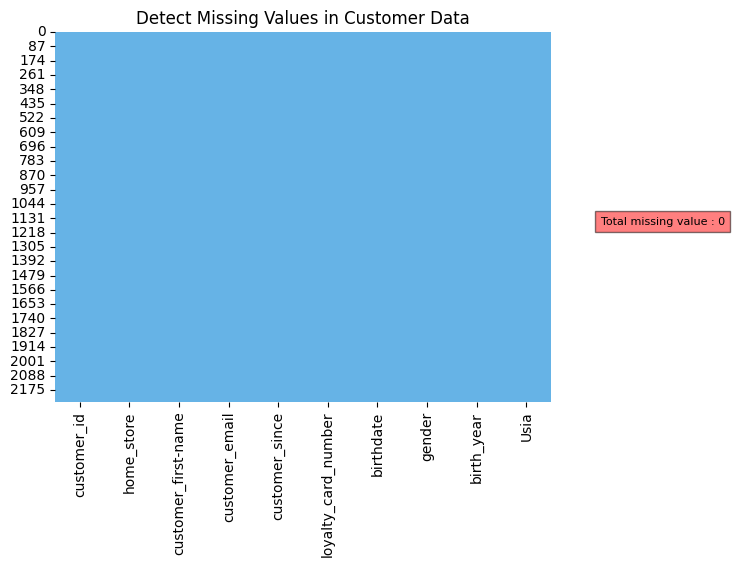

In [69]:
# Membuat plot missing value menggunakan seaborn
missing_values = Cust.isnull()
# Mengatur palet warna heatmap
cmap = sns.color_palette([(0.4, 0.7, 0.9), "red"])
# Membuat plot heatmap
sns.heatmap(missing_values, cmap=cmap, cbar=False)
# title
plt.title("Detect Missing Values in Customer Data")

# Melihat apakah ada missing value
n_missing = missing_values.sum().sum()
desc = 'Total missing value : {}'.format(n_missing)
plt.text(1.1, 0.5, desc, transform=plt.gca().transAxes,
         horizontalalignment='left', verticalalignment='top', fontsize=8,
         bbox=dict(facecolor='red', alpha=0.5,edgecolor='black'))

##### Generations data

Text(1.1, 0.5, 'Total missing value : 0')

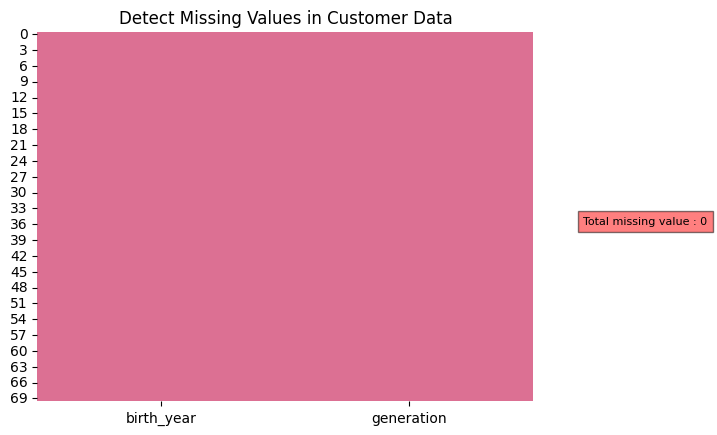

In [70]:
# Membuat plot missing value menggunakan seaborn
missing_values = Gen.isnull()
# Mengatur palet warna heatmap
cmap = sns.color_palette([(0.863, 0.439, 0.576), "red"])
# Membuat plot heatmap
sns.heatmap(missing_values, cmap=cmap, cbar=False)
# title
plt.title("Detect Missing Values in Customer Data")

# Melihat apakah ada missing value
n_missing = missing_values.sum().sum()
desc = 'Total missing value : {}'.format(n_missing)
plt.text(1.1, 0.5, desc, transform=plt.gca().transAxes,
         horizontalalignment='left', verticalalignment='top', fontsize=8,
         bbox=dict(facecolor='red', alpha=0.5,edgecolor='black'))

Pastry_Inventory data


Text(1.1, 0.5, 'Total missing value : 0')

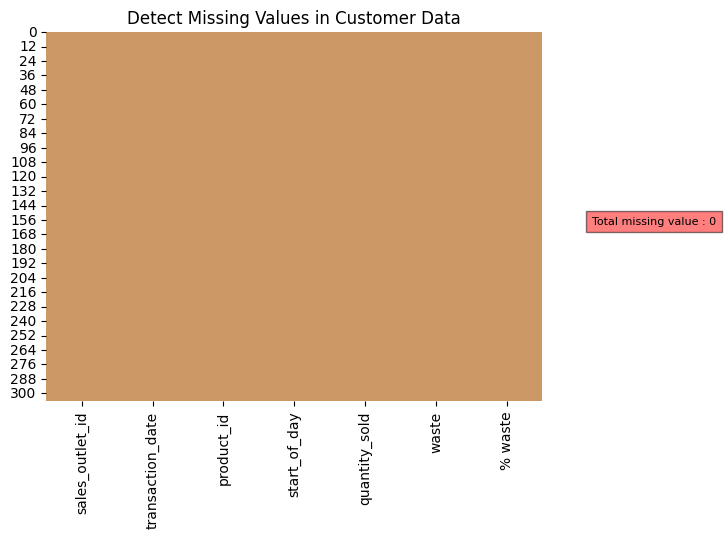

In [71]:
# Membuat plot missing value menggunakan seaborn
missing_values = Pas_inv.isnull()
# Mengatur palet warna heatmap
cmap = sns.color_palette([(0.8, 0.6, 0.4), "red"])
# Membuat plot heatmap
sns.heatmap(missing_values, cmap=cmap, cbar=False)
# title
plt.title("Detect Missing Values in Customer Data")

# Melihat apakah ada missing value
n_missing = missing_values.sum().sum()
desc = 'Total missing value : {}'.format(n_missing)
plt.text(1.1, 0.5, desc, transform=plt.gca().transAxes,
         horizontalalignment='left', verticalalignment='top', fontsize=8,
         bbox=dict(facecolor='red', alpha=0.5,edgecolor='black'))

 Product data


Text(1.1, 0.5, 'Total missing value : 0')

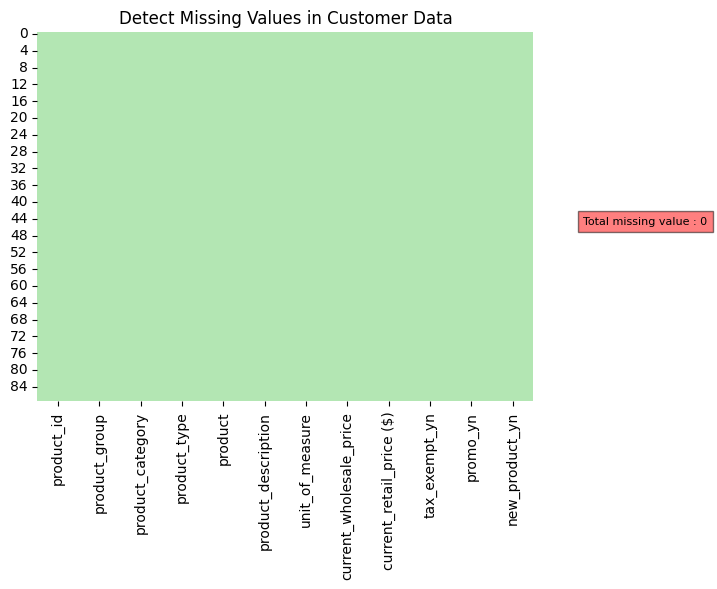

In [72]:
# Membuat plot missing value menggunakan seaborn
missing_values = Prod.isnull()
# Mengatur palet warna heatmap
cmap = sns.color_palette([(0.7, 0.9, 0.7), "red"])
# Membuat plot heatmap
sns.heatmap(missing_values, cmap=cmap, cbar=False)
# title
plt.title("Detect Missing Values in Customer Data")

# Melihat apakah ada missing value
n_missing = missing_values.sum().sum()
desc = 'Total missing value : {}'.format(n_missing)
plt.text(1.1, 0.5, desc, transform=plt.gca().transAxes,
         horizontalalignment='left', verticalalignment='top', fontsize=8,
         bbox=dict(facecolor='red', alpha=0.5,edgecolor='black'))

 Sales_Outlet data


Text(1.1, 0.5, 'Total missing value : 0')

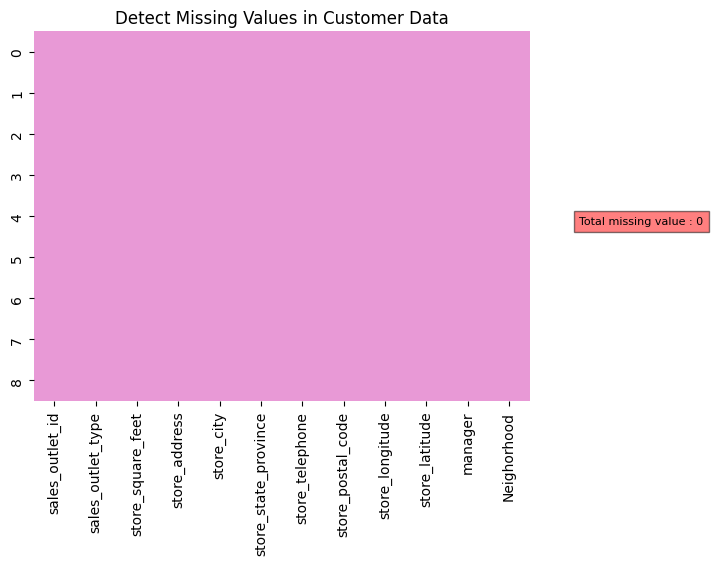

In [73]:
# Membuat plot missing value menggunakan seaborn
missing_values = Sale_Out.isnull()
# Mengatur palet warna heatmap
cmap = sns.color_palette([(0.91, 0.6, 0.84), "red"])
# Membuat plot heatmap
sns.heatmap(missing_values, cmap=cmap, cbar=False)
# title
plt.title("Detect Missing Values in Customer Data")

# Melihat apakah ada missing value
n_missing = missing_values.sum().sum()
desc = 'Total missing value : {}'.format(n_missing)
plt.text(1.1, 0.5, desc, transform=plt.gca().transAxes,
         horizontalalignment='left', verticalalignment='top', fontsize=8,
         bbox=dict(facecolor='red', alpha=0.5,edgecolor='black'))

 Sales_Reciepts data

Text(1.1, 0.5, 'Total missing value : 0')

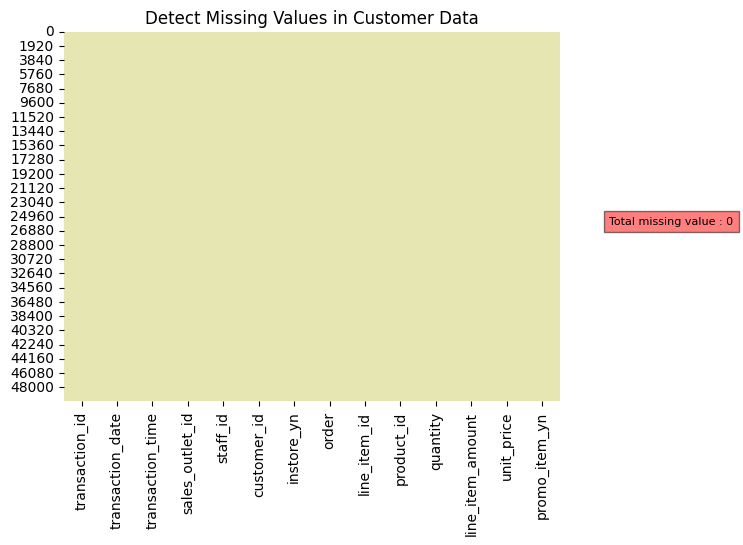

In [74]:
# Membuat plot missing value menggunakan seaborn
missing_values = Sale_Rec.isnull()
# Mengatur palet warna heatmap
cmap = sns.color_palette([(0.9, 0.9, 0.7), "red"])
# Membuat plot heatmap
sns.heatmap(missing_values, cmap=cmap, cbar=False)
# title
plt.title("Detect Missing Values in Customer Data")

# Melihat apakah ada missing value
n_missing = missing_values.sum().sum()
desc = 'Total missing value : {}'.format(n_missing)
plt.text(1.1, 0.5, desc, transform=plt.gca().transAxes,
         horizontalalignment='left', verticalalignment='top', fontsize=8,
         bbox=dict(facecolor='red', alpha=0.5,edgecolor='black'))

### Setelah data bersih export data yang bersih agar dapat divisualisasikan di tableau

In [75]:
#Membuat file Excel dan mengekspor data frame ke sheet yang berbeda-beda
with pd.ExcelWriter('Data_coffee_shop_clean.xlsx') as writer:
    Cust.to_excel(writer, sheet_name='Customer', index=False)
    Gen.to_excel(writer, sheet_name='Generations', index=False)
    Pas_inv.to_excel(writer, sheet_name='Pastry_Inventory', index=False)
    Prod.to_excel(writer, sheet_name='Product ', index=False)
    Sale_Out.to_excel(writer, sheet_name='Sales_Outlet', index=False)
    Sale_Rec.to_excel(writer, sheet_name='Sales_Reciepts', index=False)

## 8. Rekomendasi

- Meningkatkan promo pada setiap produk
- Memanfaatkan email untuk pemberitahuan ke customer jika ada promo dan variasi produk abru
- Memberikan reward, seperti produk gratis jika pembelian mencapai batas maximal yang ditentukan
- Membuat variasi makanan yang berkaitan dengan rasa coklat mengingat customer sangat tertarik dengan croisant varian coklat
- Pengurangan stok ginger sconne mengingat sisa produk ini yang terlalu banyak
- Membuka store baru sekitar 100 church street mengingat daerah tersebut memiliki banyak pengunjung, penjualan terbanyak, dan keuntungan yang cukup signifikan banyak



## 9. Kesimpulan - Create the story

- Dari analisa data yang dilakukan di tableau dapat di simpulkan beberapa hal seperti dalam segi profiling pelanggan dimana penambahan customer pada masing-masing store setiap bulannya ada yang mengalami peningkatan maupun penurunan, tetapi jika dibandingkan, customer pada awal bulan sangat tinggi dibanding dengan bulan selanjutnya dan hal tersebut berlaku pada setiap store
- Rata-rata uang yang dikeluarkan customer sekitaran 3$ dimana ini berarti customer rata-rata hanya membeli 1 produk pada setiap melakukan pembelanjaan
- Analisis penjualan produk yang banyak diminati jika dilihat berdasar kategori generasi, chocolate croissant merupakan produk yang paling banyak diminati disemua generasi, kecuali pada generasi older millenials dimana produk yang paling diminati adalah ginger sconne
- Produk yang memiliki promo hanya sedikit, yaitu pada produk ginger sconne dimana penjualan produk yang memiliki promo mengalami peningkatan yang stabil
- Produk yang paling rekomendasi di setiap store yaitu chocolate croissant 
- Penjualan terbanyak terdapat pada store 100 church street lalu diikuti 32-20 broadway dan 687 9th avenue
- Produk yang banyak terjual dimasing-masing store adalah ginger sconne
- Produk yang memiliki banyak sisa pada masing-masing store adalah ginger sconne
- Pengunjung paling banyak terdapat pada store address 100 church street dimana keuntungan yang didapat cukup tinggi mencapai 200 ribu lebih